In [5]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

1. Fit and Summarize (remember to print) the results from an OLS model where the outcome is enroll and the predictor being accept. 
1.a. Print the confidence and prediction interval for the first 5 observations.
1.b. Plot enroll and accept, with the predicted line. 

2. Fit and Summarize the results from an OLS model where the outcome is enroll and the predictor are accept and expend.
2.a. Compute the variance inflation factor for each predictor. 

In [6]:
# Load data: college
import pandas as pd
# 3
df = pd.read_csv('College.csv')
df
print(df.columns)

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')


In [8]:
# 1 outcome: Enroll, predictor: Accept
y = df['Enroll']
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                  'Accept': df['Accept']})
X[:5]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Enroll   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3813.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.67e-301
Time:                        09:56:37   Log-Likelihood:                -5721.4
No. Observations:                 777   AIC:                         1.145e+04
Df Residuals:                     775   BIC:                         1.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     82.3021     17.765      4.633      0.0

In [9]:
# 1.a. Print the confidence and prediction interval for the first 5 observations.
design = MS(['Accept'])
X = design.fit_transform(df)
newX = X[:5]
print(newX)

new_predictions = results.get_prediction(newX); 
pred_mean = new_predictions.predicted_mean 
print('predicted mean',pred_mean)

confidence_int = new_predictions.conf_int(alpha=0.05)
prediction_int = new_predictions.conf_int(obs=True, alpha=0.05)
print('confidence interval',confidence_int)
print('prediction interval',prediction_int)


   intercept  Accept
0        1.0    1232
1        1.0    1924
2        1.0    1097
3        1.0     349
4        1.0     146
predicted mean [508.0642647  747.20989214 461.41013218 202.91167939 132.75768753]
confidence interval [[479.79887554 536.32965386]
 [720.27853777 774.14124651]
 [432.65647858 490.16378578]
 [170.34255744 235.48080134]
 [ 98.88221955 166.6331555 ]]
prediction interval [[-242.61040497 1258.73893436]
 [  -3.41573046 1497.83551474]
 [-289.28308083 1212.10334518]
 [-547.93735681  953.76071559]
 [-618.14914743  883.66452248]]


In [10]:
print(results.params)

intercept    82.302107
Accept        0.345586
dtype: float64


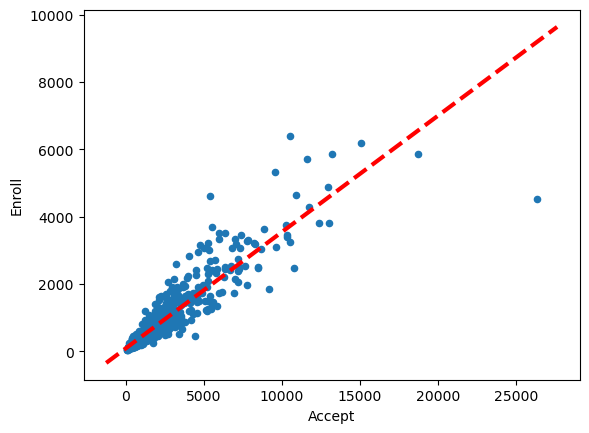

In [11]:
# 1.b. Plot enroll and accept, with the predicted line. 
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = df.plot.scatter('Accept', 'Enroll')
abline(ax,
       results.params.iloc[0],
       results.params.iloc[1],
       'r--',
       linewidth=3)

In [12]:
# 2. Fit and Summarize the results from an OLS model where the outcome is enroll and the predictor are accept and expend.
X = MS(['Accept', 'Expend']).fit_transform(df)
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(summarize(results1))

               coef  std err       t  P>|t|
intercept  163.9809   29.783   5.506  0.000
Accept       0.3480    0.006  62.109  0.000
Expend      -0.0090    0.003  -3.404  0.001


In [13]:
# 2.a. Compute the variance inflation factor for each predictor. 
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
print(vif)
#The variance inflation factor is a way to assess multicollinearity. Can read more about it on pg 108 of textbook.

           vif
Accept  1.0158
Expend  1.0158
